In [1]:
import torch, sys, os, random, json, scipy
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import zoom
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from neuralop.models import TFNO
from neuralop.utils import count_params
from scipy.io import savemat, loadmat
from tqdm import tqdm

%matplotlib widget

In [13]:
std = 2e-2
correlation = 'high'
data_path = '/home/sci/hdai/Projects/Datasets/Ultrasound/GRF/mats'
water_tof = loadmat('/home/sci/hdai/Projects/Datasets/Ultrasound/GRF/water_tof.mat')

if not os.path.isdir(f'{data_path}/tof_noise{std}'):
    os.mkdir(f'{data_path}/tof_noise{std}')
    
for i in tqdm(range(1,200+1)):
    tof_array = np.zeros((128,128))
    for j in range(1,128+1):
        try:
            distribution_pair = loadmat(f'{data_path}/distribution_pair/grf_{correlation}{i}_pos{j}_distribution_pair.mat')
        except:
            print(f'{data_path}/distribution_pair/grf_{correlation}{i}_pos{j}_distribution_pair.mat')
            continue
        sensor_data = distribution_pair['simulation_data'][0][0]['sensor_data']
        length = sensor_data.shape[1]
        noise_j = np.random.normal(0,std,length)
        for k in range(128):
            noise_k = np.random.normal(0,std,length)
            corr_list = scipy.signal.correlate(sensor_data[j-1]+noise_j, sensor_data[k]+noise_k)
            tof_array[j-1,k] = (length-np.argmax(corr_list))*4e-8
    tof_dict = {}
    tof_dict['tof_array'] = tof_array - water_tof['tof_array']
    savemat(f'{data_path}/tof_noise{std}/grf_{correlation}{i}_tof.mat', tof_dict)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [20:15<00:00,  6.08s/it]


In [14]:
std = 5e-2
correlation = 'high'
data_path = '/home/sci/hdai/Projects/Datasets/Ultrasound/GRF/mats'
water_tof = loadmat('/home/sci/hdai/Projects/Datasets/Ultrasound/GRF/water_tof.mat')

if not os.path.isdir(f'{data_path}/tof_noise{std}'):
    os.mkdir(f'{data_path}/tof_noise{std}')
    
for i in tqdm(range(1,200+1)):
    tof_array = np.zeros((128,128))
    for j in range(1,128+1):
        try:
            distribution_pair = loadmat(f'{data_path}/distribution_pair/grf_{correlation}{i}_pos{j}_distribution_pair.mat')
        except:
            print(f'{data_path}/distribution_pair/grf_{correlation}{i}_pos{j}_distribution_pair.mat')
            continue
        sensor_data = distribution_pair['simulation_data'][0][0]['sensor_data']
        length = sensor_data.shape[1]
        noise_j = np.random.normal(0,std,length)
        for k in range(128):
            noise_k = np.random.normal(0,std,length)
            corr_list = scipy.signal.correlate(sensor_data[j-1]+noise_j, sensor_data[k]+noise_k)
            tof_array[j-1,k] = (length-np.argmax(corr_list))*4e-8
    tof_dict = {}
    tof_dict['tof_array'] = tof_array - water_tof['tof_array']
    savemat(f'{data_path}/tof_noise{std}/grf_{correlation}{i}_tof.mat', tof_dict)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [20:04<00:00,  6.02s/it]


In [11]:
0.02/np.sqrt(np.mean(sensor_data[31]**2))

0.050466132380299525

In [18]:
np.mean(np.abs(sensor_data[31]))

0.19123263416787772

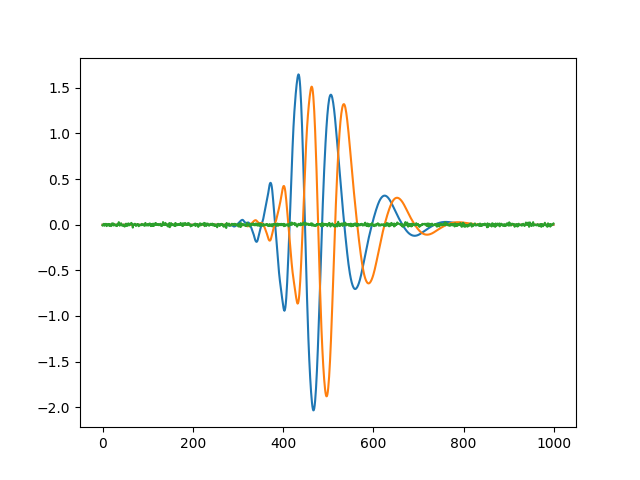

In [5]:
plt.figure()
plt.plot(sensor_data[31])
plt.plot(sensor_data[0])
plt.plot(noise_j)